# **Heart Disease Prediction**

This project aims to develop a machine learning model to predict the likelihood of heart disease in individuals based on their medical data. Using clinical features such as age, cholesterol levels, blood pressure, and other relevant metrics, the model will classify whether a person is at risk of heart disease. The project includes data preprocessing, exploratory data analysis, feature selection, model training, and evaluation to ensure accurate and reliable predictions.

### Importing Libraries

In [3]:
# For data loading and manuplution purposes
import pandas as pd
# For numerical and matrix 
import numpy as np
# For plotting different types of graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading data 

In [38]:
df=pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [39]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

#### Dataset Columns Explanation

- **Age**: The age of the individual (years).
- **Gender**: The biological gender of the individual (1 = Male, 0 = Female).
- **Chest Pain Type**: Type of chest pain experienced (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-Anginal Pain, 4 = Asymptomatic).
- **Resting Blood Pressure (mm Hg)**: Resting blood pressure in millimeters of mercury (mm Hg).
- **Serum Cholesterol (mg/dl)**: Serum cholesterol level in milligrams per deciliter.
- **Fasting Blood Sugar > 120 mg/dl**: Fasting blood sugar level (>120 mg/dl is considered high; 1 = True, 0 = False).
- **Resting Electrocardiographic Results**: Results of the resting ECG (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy).
- **Maximum Heart Rate Achieved**: The maximum heart rate achieved during the test.
- **Exercise-Induced Angina**: Presence of angina induced by exercise (1 = Yes, 0 = No).
- **ST Depression Induced by Exercise**: Depression in ST segment caused by exercise relative to rest.
- **Slope of Peak Exercise ST Segment**: Slope of the ST segment during peak exercise (1 = Upsloping, 2 = Flat, 3 = Downsloping).
- **Number of Major Vessels (Fluoroscopy)**: Number of major vessels colored by fluoroscopy (0–3).
- **Thallium Stress Test Results**: Results from the thallium stress test (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect).
- **Heart Disease (Target)**: Target variable indicating the presence of heart disease (1 = Disease, 0 = No Disease).


In [40]:
df.rename(columns={
    'Age': 'Age',
    'Sex': 'Gender',
    'Chest pain type': 'Chest Pain Type',
    'BP': 'Resting Blood Pressure',
    'Cholesterol': 'Serum Cholesterol',
    'FBS over 120': 'Fasting Blood Sugar',
    'EKG results': 'Resting Electrocardiographic Results',
    'Max HR': 'Maximum Heart Rate',
    'Exercise angina': 'Exercise-Induced Angina',
    'ST depression': 'ST Depression Induced by Exercise',
    'Slope of ST': 'Slope of Peak Exercise ST Segment',
    'Number of vessels fluro': 'Number of Major Vessels (Fluoroscopy)',
    'Thallium': 'Thallium Stress Test Results',
    'Heart Disease': 'Heart Disease'
}, inplace=True)

In [41]:
df.head()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate,Exercise-Induced Angina,ST Depression Induced by Exercise,Slope of Peak Exercise ST Segment,Number of Major Vessels (Fluoroscopy),Thallium Stress Test Results,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [42]:
df.tail()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate,Exercise-Induced Angina,ST Depression Induced by Exercise,Slope of Peak Exercise ST Segment,Number of Major Vessels (Fluoroscopy),Thallium Stress Test Results,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


### Data Exploration and Cleaning

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    270 non-null    int64  
 1   Gender                                 270 non-null    int64  
 2   Chest Pain Type                        270 non-null    int64  
 3   Resting Blood Pressure                 270 non-null    int64  
 4   Serum Cholesterol                      270 non-null    int64  
 5   Fasting Blood Sugar                    270 non-null    int64  
 6   Resting Electrocardiographic Results   270 non-null    int64  
 7   Maximum Heart Rate                     270 non-null    int64  
 8   Exercise-Induced Angina                270 non-null    int64  
 9   ST Depression Induced by Exercise      270 non-null    float64
 10  Slope of Peak Exercise ST Segment      270 non-null    int64  
 11  Number

In [44]:
df.describe()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate,Exercise-Induced Angina,ST Depression Induced by Exercise,Slope of Peak Exercise ST Segment,Number of Major Vessels (Fluoroscopy),Thallium Stress Test Results
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [45]:
df.isnull().sum()

Age                                      0
Gender                                   0
Chest Pain Type                          0
Resting Blood Pressure                   0
Serum Cholesterol                        0
Fasting Blood Sugar                      0
Resting Electrocardiographic Results     0
Maximum Heart Rate                       0
Exercise-Induced Angina                  0
ST Depression Induced by Exercise        0
Slope of Peak Exercise ST Segment        0
Number of Major Vessels (Fluoroscopy)    0
Thallium Stress Test Results             0
Heart Disease                            0
dtype: int64

There is no null value in the dataset so we dont need to do anything with the missing values.

In [46]:
dup=df.duplicated().sum()
print('Number of duplicate rows =',dup)

Number of duplicate rows = 0


### Exploratory Data Analysis (EDA)

In [47]:
# Convert the 'Heart Disease' column to binary (0/1)  necessary for the model and plotting
#lable encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])

df.head()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate,Exercise-Induced Angina,ST Depression Induced by Exercise,Slope of Peak Exercise ST Segment,Number of Major Vessels (Fluoroscopy),Thallium Stress Test Results,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Bar Plot: Gender Distribution

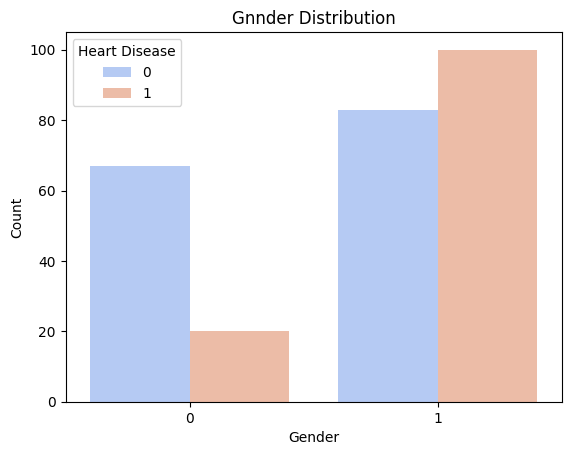

In [48]:
sns.countplot(x='Gender',data=df,palette='coolwarm',hue='Heart Disease')
plt.title('Gnnder Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Means mostly the mens have the heart disease.

Pie Chart: Heart Disease Proportion

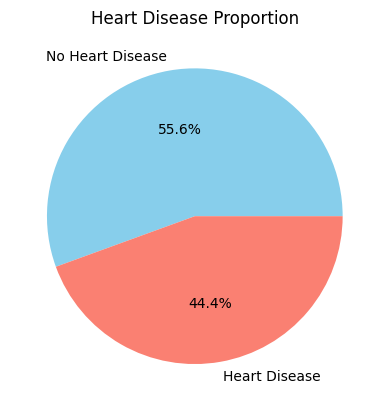

In [49]:
df['Heart Disease'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No Heart Disease', 'Heart Disease'], colors=['skyblue', 'salmon'])
plt.title('Heart Disease Proportion')
plt.ylabel('')
plt.show()

So almost 45% of the individuals in the dataset have heart disease.

Histogram: Age Distribution

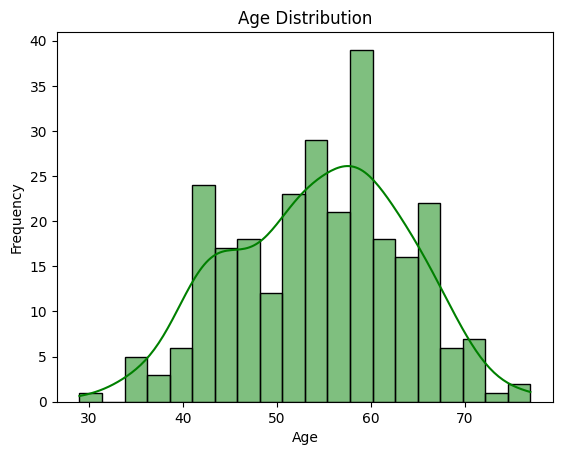

In [50]:
sns.histplot(df['Age'], kde=True, bins=20, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Box Plot: Resting Blood Pressure by Heart Disease

C:\Users\Hp\AppData\Local\Temp\ipykernel_6832\1790182197.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Disease', y='Resting Blood Pressure', data=df, palette='Set2')


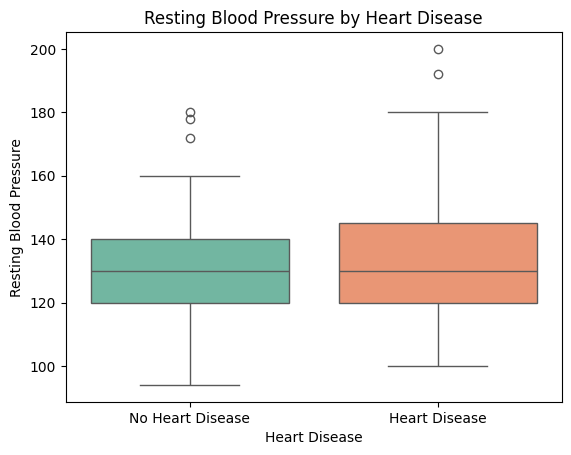

In [51]:
sns.boxplot(x='Heart Disease', y='Resting Blood Pressure', data=df, palette='Set2')
plt.title('Resting Blood Pressure by Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.show()


Correlation Heatmap

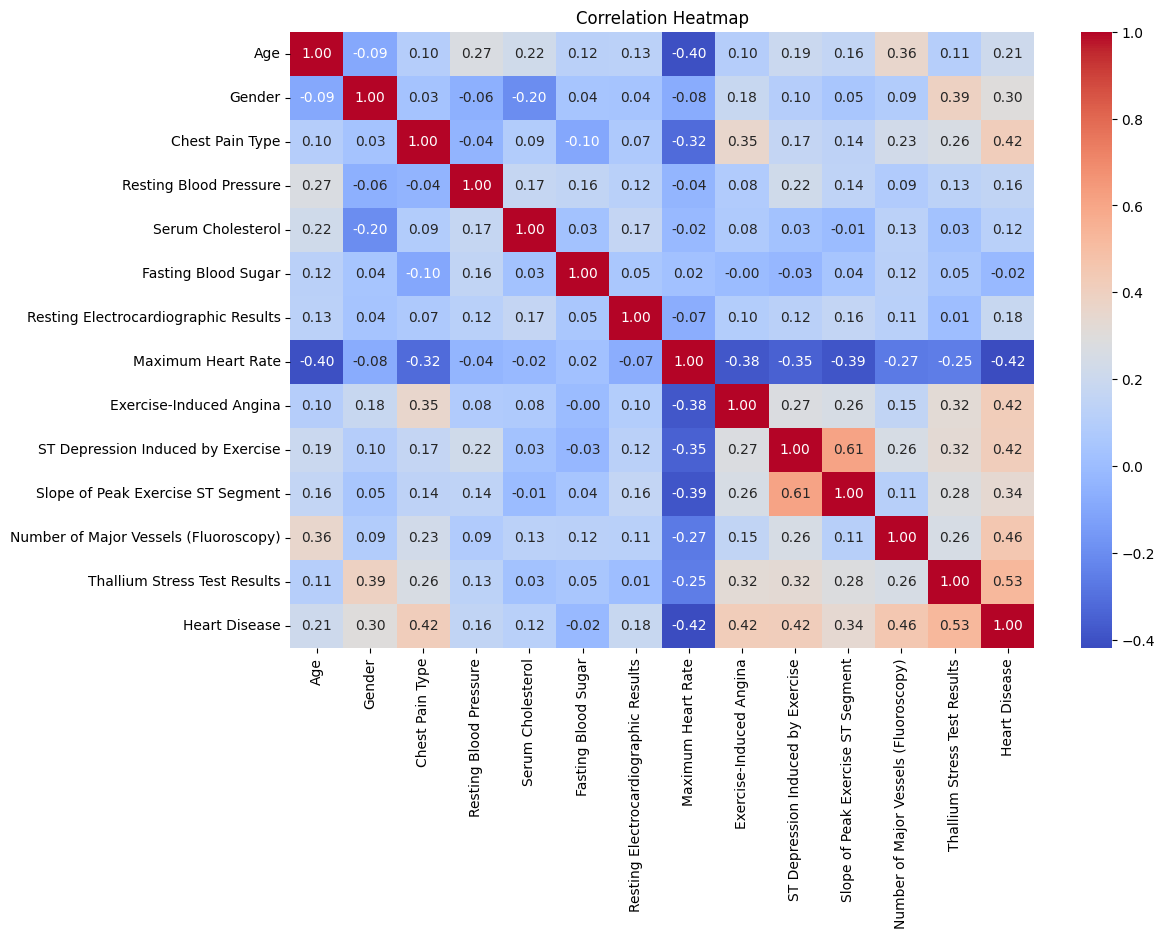

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Pairplot: Relationship Between Features

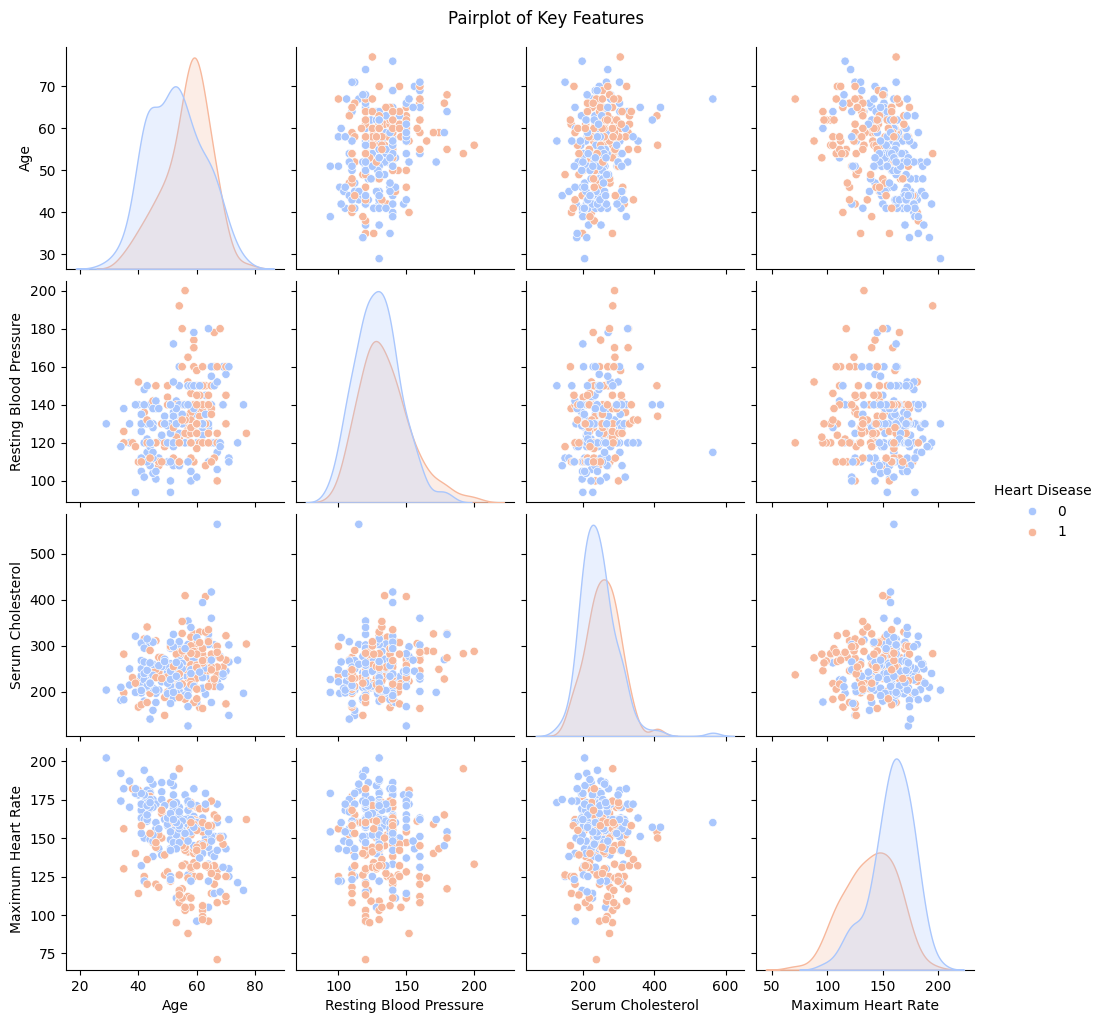

In [ ]:
sns.pairplot(df, vars=['Age', 'Resting Blood Pressure', 'Serum Cholesterol', 'Maximum Heart Rate'], hue='Heart Disease', palette='coolwarm')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

- Age vs. Max Heart Rate: Inversely related; older individuals tend to have lower maximum heart rates.
- Serum Cholesterol, Resting Blood Pressure: No strong correlation with other features.
- Heart Disease (Color-coded): Patients with heart disease (orange) tend to have lower max heart rates and slightly higher ages compared to those without (blue).

Count Plot: Chest Pain Type

In [55]:
# Count and print different values of chest pain type
df['Chest Pain Type'].value_counts()

Chest Pain Type
4    129
3     79
2     42
1     20
Name: count, dtype: int64

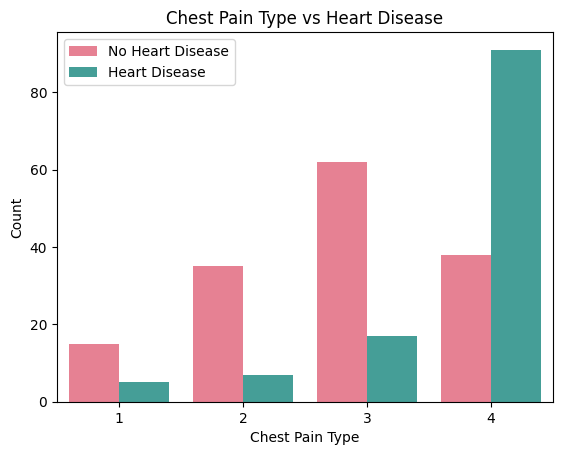

In [54]:
sns.countplot(x='Chest Pain Type', hue='Heart Disease', data=df, palette='husl')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()


Scatter Plot: Age vs. Maximum Heart Rate

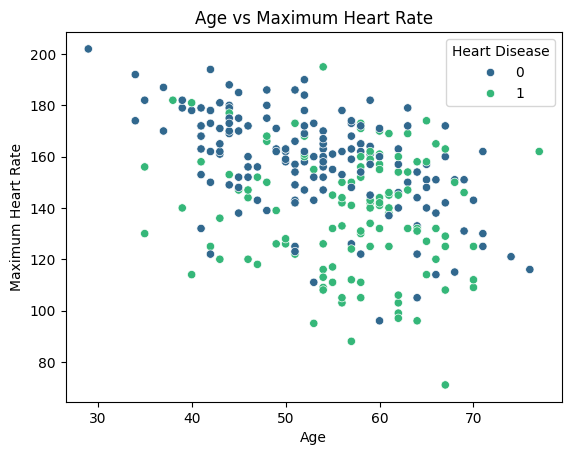

In [56]:
sns.scatterplot(x='Age', y='Maximum Heart Rate', hue='Heart Disease', data=df, palette='viridis')
plt.title('Age vs Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()


1. Age vs. Maximum Heart Rate Relationship: As people get older, their heart’s ability to reach high rates during exercise naturally decreases. This means that younger people generally have higher maximum heart rates than older people.
2. Heart Disease Impact: People with heart disease (green points) tend to have lower maximum heart rates compared to those without heart disease (blue points). This means that if a person has heart dis